**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Javier Augusto Rebull Saucedo
*   MATRÍCULA: A01795838


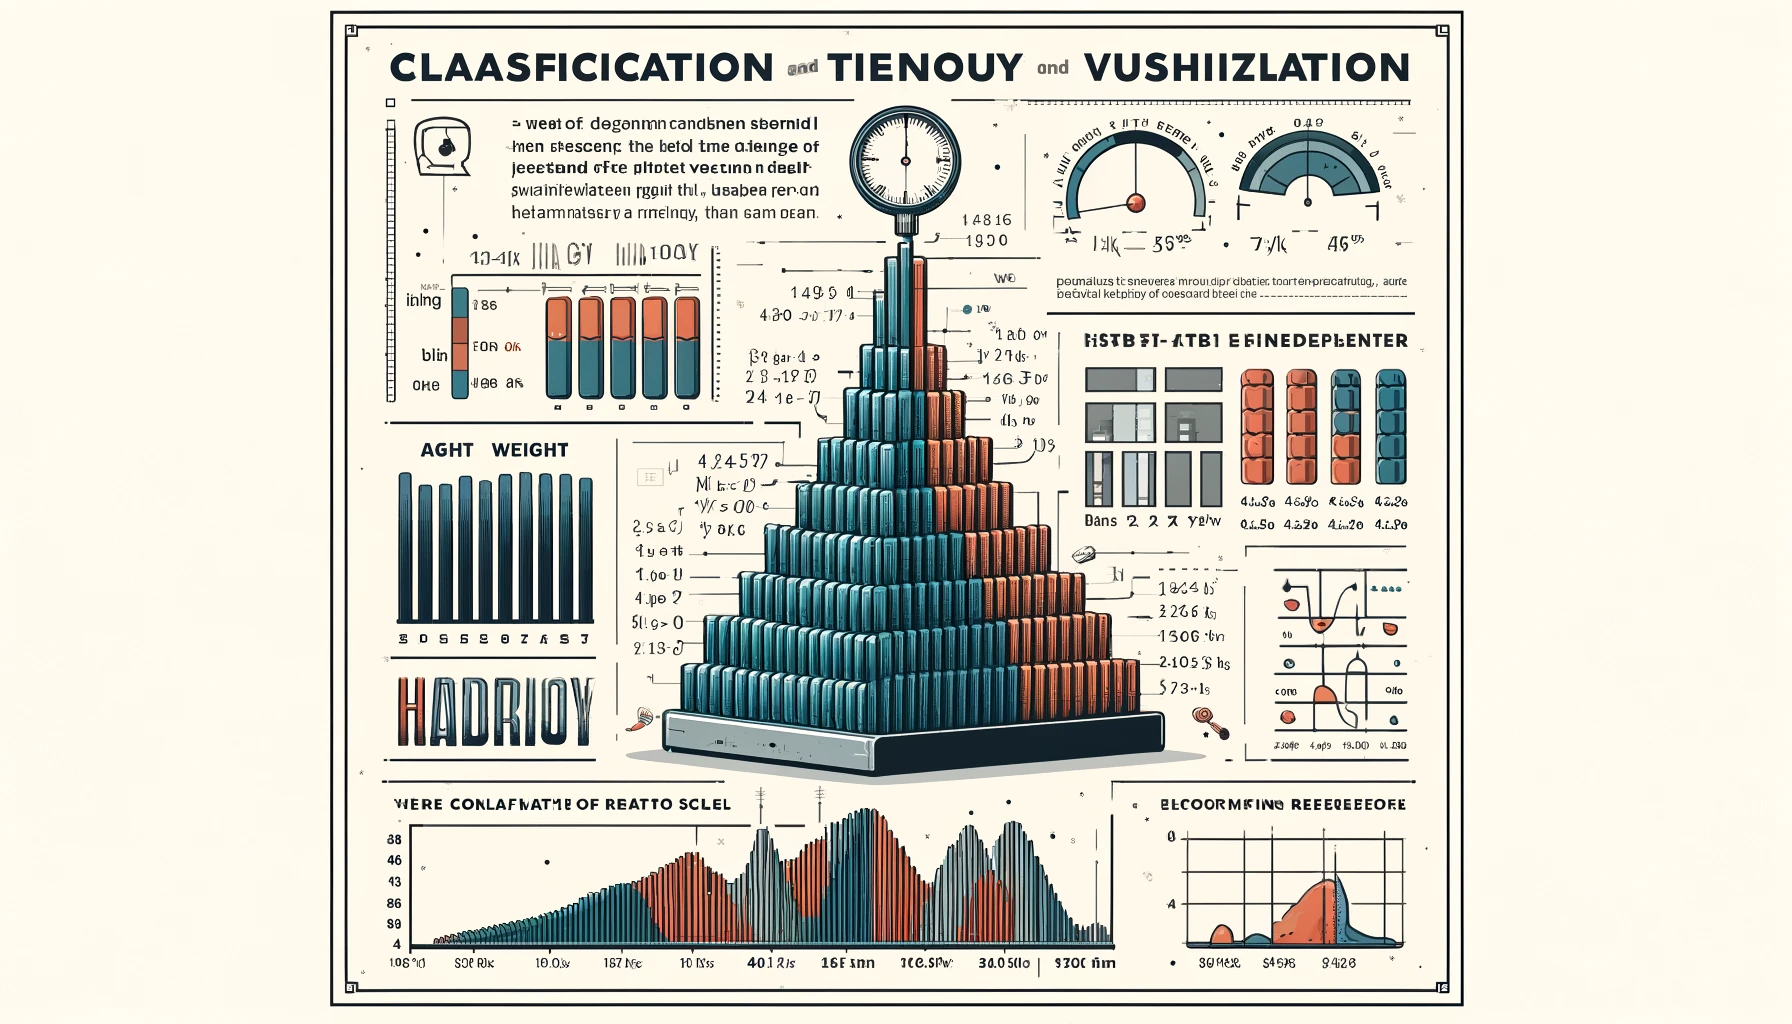

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(DIR)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Instalar la biblioteca colorama y tabulate
!pip install colorama tabulate

from colorama import Fore, Style
from tabulate import tabulate

# Definir un color naranja usando secuencias ANSI
Fore.ORANGE = '\033[38;5;208m'

In [5]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


# 1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

# **Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método info()**

In [6]:
# Utilizar el método info() para identificar los tipos de variables
response_df.info()

# Separar las columnas según su tipo
ColumnasNumericas = response_df.select_dtypes(include=['number']).columns
ColumnasTexto = response_df.select_dtypes(include=['object']).columns

# Contar las columnas numéricas y de texto
NumColumnasNumericas = len(ColumnasNumericas)
NumColumnasTexto = len(ColumnasTexto)

# Mostrar los resultados con espacios y colores
print()
print(f"{Fore.ORANGE}Número de columnas numéricas: {Fore.GREEN}{NumColumnasNumericas}{Style.RESET_ALL}")
print()
print(f"{Fore.ORANGE}Número de columnas de texto: {Fore.GREEN}{NumColumnasTexto}{Style.RESET_ALL}")
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB

Número de columnas numéricas: 139

Número de columnas de texto: 11



# **Utiliza el método describe() del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).**

In [7]:
# Formatear los números según las especificaciones
def FormatearResumen(ResumenDf):
    ResumenDfFormateado = ResumenDf.copy()
    ResumenDfFormateado.loc['count'] = ResumenDfFormateado.loc['count'].map('{:,.0f}'.format)
    ResumenDfFormateado.loc['mean'] = ResumenDfFormateado.loc['mean'].map('{:.2f}'.format)
    ResumenDfFormateado.loc['std'] = ResumenDfFormateado.loc['std'].map('{:.2f}'.format)
    ResumenDfFormateado.loc[['min', '25%', '50%', '75%', 'max']] = ResumenDfFormateado.loc[['min', '25%', '50%', '75%', 'max']].applymap('{:.0f}'.format)
    return ResumenDfFormateado

# Utilizar el método describe() para obtener un resumen de las estadísticas descriptivas
ResumenNumerico = response_df.select_dtypes(include=['number']).describe()
ResumenTexto = response_df.select_dtypes(include=['object']).describe()

# Formatear los resúmenes estadísticos
ResumenNumericoFormateado = FormatearResumen(ResumenNumerico)
ResumenTextoFormateado = ResumenTexto.copy()

# Convertir los resúmenes estadísticos a tablas con tabulate
TablaResumenNumerico = tabulate(ResumenNumericoFormateado, headers='keys', tablefmt='pretty', showindex=True, numalign="right", stralign="right")
TablaResumenTexto = tabulate(ResumenTextoFormateado, headers='keys', tablefmt='pretty', showindex=True, numalign="right", stralign="right")

# Mostrar los resúmenes estadísticos con espacios, colores y formato bonito
print()
print(f"{Fore.ORANGE}Resumen estadístico de las variables numéricas:{Style.RESET_ALL}")
print(TablaResumenNumerico)
print()
print(f"{Fore.ORANGE}Resumen estadístico de las variables de texto:{Style.RESET_ALL}")
print(TablaResumenTexto)
print()


Resumen estadístico de las variables numéricas:
+-------+-------+--------------------------+-------+-------+---------+-----------------+---------+-------+-------+-------------------+-------+-------------+-------------+-------------+-------------+-------------+--------+----------------+-------+--------+--------+----------+--------+----------+--------+-------+---------------------+----------+-------------+---------+--------+---------+------------+----------+-------------+---------+----------+-------+--------------------+---------+-----------+---------+-----------+-------------------+----------+-------+-------+-----------------+----------+-----------------------+---------+---------------------+---------+---------------+--------------+-----------+-------------+----------+------------------------+---------+------------------+-------------------+-------+--------+-------+----------+---------+---------+--------+-------+--------+----------------+-------------------------+----------------+-----

# 2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.



La variable 'Weight' es cuantitativa (numérica).

Fundamento de la elección del gráfico:
• Histograma: Se elige para variables cuantitativas porque muestra cómo se distribuyen los valores de la variable en intervalos, permitiendo observar patrones como la simetría, la dispersión y la presencia de valores atípicos.



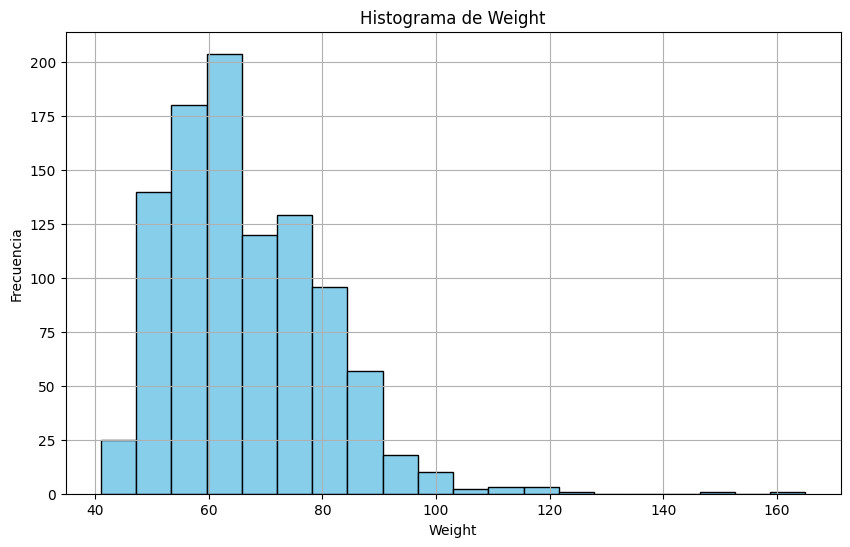

In [8]:
# Determinar el tipo de la variable Peso
TipoPeso = response_df['Weight'].dtype

# Clasificar la variable y elegir el gráfico adecuado
if pd.api.types.is_numeric_dtype(TipoPeso):
    # Peso es una variable cuantitativa
    print()
    print(f"{Fore.BLUE}La variable 'Weight' es cuantitativa (numérica).{Style.RESET_ALL}")
    print()

    # Fundamento de la elección del gráfico
    print(f"{Fore.ORANGE}Fundamento de la elección del gráfico:{Style.RESET_ALL}")
    print("• Histograma: Se elige para variables cuantitativas porque muestra cómo se distribuyen los valores de la variable en intervalos, permitiendo observar patrones como la simetría, la dispersión y la presencia de valores atípicos.")
    print()

    # Generar histograma con un azul más suave
    plt.figure(figsize=(10, 6))
    plt.hist(response_df['Weight'].dropna(), bins=20, color='#87CEEB', edgecolor='black')  # Usar un azul más suave
    plt.title('Histograma de Weight')
    plt.xlabel('Weight')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
else:
    # Peso es una variable cualitativa
    print()
    print(f"{Fore.ORANGE}La variable 'Weight' es cualitativa (categórica).{Style.RESET_ALL}")
    print()

    # Fundamento de la elección del gráfico
    print(f"{Fore.ORANGE}Fundamento de la elección del gráfico:{Style.RESETALL}")
    print("• Gráfico de barras: Se elige para variables cualitativas porque muestra la frecuencia de cada categoría, facilitando la comparación entre diferentes categorías y la identificación de las más comunes o menos frecuentes.")
    print()

    # Generar gráfico de barras
    plt.figure(figsize=(10, 6))
    response_df['Weight'].value_counts().plot(kind='bar', color='#87CEEB', edgecolor='black')  # Usar un azul más suave
    plt.title('Gráfico de barras de Weight')
    plt.xlabel('Categorías de Weight')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# 3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [9]:
# Calcular la asimetría (skewness) de la variable Weight
AsimetriaPeso = response_df['Weight'].skew()

# Mostrar el valor de la asimetría y su interpretación
print()
print(f"{Fore.BLUE}Asimetría de la variable 'Weight':{Style.RESET_ALL}")
print(f"{Fore.GREEN}{AsimetriaPeso:.2f}{Style.RESET_ALL}")
print()

if AsimetriaPeso > 0:
    print(f"{Fore.ORANGE}La distribución del peso está sesgada hacia la derecha.{Style.RESET_ALL}")
    Justificacion = (
        "Una asimetría positiva indica que la distribución tiene una cola más larga hacia la derecha. "
        "Esto sugiere que hay valores extremos más altos que son menos frecuentes.\n"
        "El valor positivo de la asimetría (skewness) = {:.2f} indica que la mayoría de los datos están "
        "concentrados en el extremo inferior, con algunos valores extremos en el extremo superior."
    ).format(AsimetriaPeso)
elif AsimetriaPeso < 0:
    print(f"{Fore.ORANGE}La distribución del peso está sesgada hacia la izquierda.{Style.RESET_ALL}")
    Justificacion = (
        "Una asimetría negativa indica que la distribución tiene una cola más larga hacia la izquierda. "
        "Esto sugiere que hay valores extremos más bajos que son menos frecuentes.\n"
        "El valor negativo de la asimetría (skewness) = {:.2f} indica que la mayoría de los datos están "
        "concentrados en el extremo superior, con algunos valores extremos en el extremo inferior."
    ).format(AsimetriaPeso)
else:
    print(f"{Fore.ORANGE}La distribución del peso es simétrica.{Style.RESET_ALL}")
    Justificacion = (
        "Una asimetría de cero indica que la distribución es simétrica, es decir, los valores se distribuyen "
        "de manera uniforme a ambos lados de la media.\n"
        "El valor de la asimetría (skewness) = {:.2f} indica que no hay sesgo y que los datos están equilibrados."
    ).format(AsimetriaPeso)

# Justificación de la respuesta
print()
print(f"{Fore.RED}Justificación de la respuesta:\n {Style.RESET_ALL}")
print(f"{Justificacion}\nEl cálculo numérico que lo demuestra es la asimetría (skewness) = {AsimetriaPeso:.2f}.")

# Explicación detallada del cálculo numérico
print()
print("El cálculo de la asimetría (skewness) mide el grado de asimetría de la distribución de los datos "
      "en relación con la media.\n"
      "Un valor positivo de skewness indica que la cola derecha es más larga o tiene más valores extremos, "
      "mientras que un valor negativo indica lo contrario.\n"
      "Un valor de skewness cercano a cero indica que los datos están distribuidos de manera simétrica.\n"
      "En este caso, la asimetría (skewness) de la variable 'Weight' es {:.2f}, "
      "lo que sugiere que la distribución tiene una cola más larga hacia la derecha, mostrando así un sesgo positivo."
      .format(AsimetriaPeso))


Asimetría de la variable 'Weight':
1.22

La distribución del peso está sesgada hacia la derecha.

Justificación de la respuesta:
 
Una asimetría positiva indica que la distribución tiene una cola más larga hacia la derecha. Esto sugiere que hay valores extremos más altos que son menos frecuentes.
El valor positivo de la asimetría (skewness) = 1.22 indica que la mayoría de los datos están concentrados en el extremo inferior, con algunos valores extremos en el extremo superior.
El cálculo numérico que lo demuestra es la asimetría (skewness) = 1.22.

El cálculo de la asimetría (skewness) mide el grado de asimetría de la distribución de los datos en relación con la media.
Un valor positivo de skewness indica que la cola derecha es más larga o tiene más valores extremos, mientras que un valor negativo indica lo contrario.
Un valor de skewness cercano a cero indica que los datos están distribuidos de manera simétrica.
En este caso, la asimetría (skewness) de la variable 'Weight' es 1.22, lo

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [10]:
# Calcular el número de valores faltantes en la variable Weight
ValoresFaltantesPeso = response_df['Weight'].isna().sum()

# Calcular el porcentaje de valores faltantes
TotalValoresPeso = response_df['Weight'].size
PorcentajeFaltantesPeso = (ValoresFaltantesPeso / TotalValoresPeso) * 100

# Mostrar los resultados
print()
print(f"{Fore.BLUE}Número de valores faltantes en la variable 'Weight':{Style.RESET_ALL} {Fore.GREEN}{ValoresFaltantesPeso}{Style.RESET_ALL}")
print()
print(f"{Fore.BLUE}Porcentaje de valores faltantes en la variable 'Weight':{Style.RESET_ALL} {Fore.GREEN}{PorcentajeFaltantesPeso:.2f}%{Style.RESET_ALL}")


Número de valores faltantes en la variable 'Weight': 20

Porcentaje de valores faltantes en la variable 'Weight': 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [11]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df, str_att_name, BM_MV):
    MV_labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    labels = []
    box_sr = pd.Series('', index=BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr, vert=False)
    plt.yticks([1, 2], labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10, 4))

    att_range = (df[str_att_name].min(), df[str_att_name].max())

    for i, poss in enumerate(BM_MV.unique()):
        plt.subplot(1, 2, i + 1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist(color='#87CEEB')  # Azul claro
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data, group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [12]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df, str_att_name, BM_MV):
    MV_labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    plt.figure(figsize=(10, 4))
    for i, poss in enumerate(BM_MV.unique()):
        plt.subplot(1, 2, i + 1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar(color='#87CEEB')  # Azul claro
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV, df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Análisis de la relación entre valores faltantes de 'Weight' y otras variables

Análisis de variables numéricas:

Variable: Age


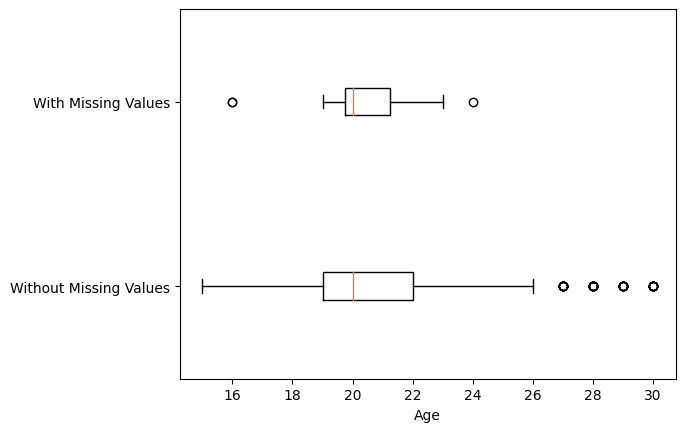

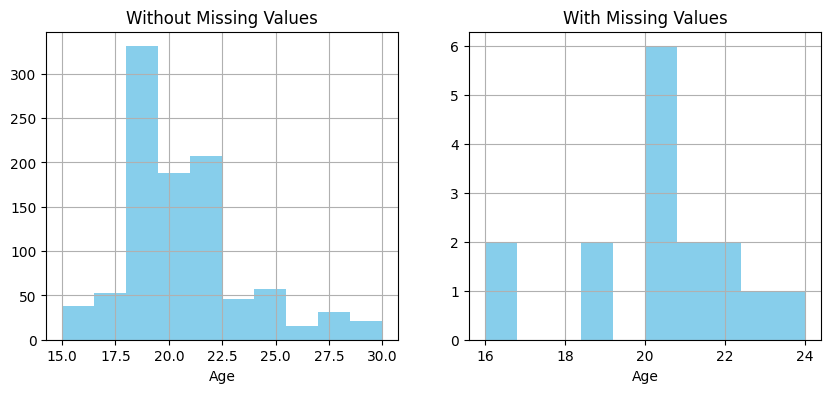

p-value of t-test: 0.7258243979822129

Variable: Number of siblings


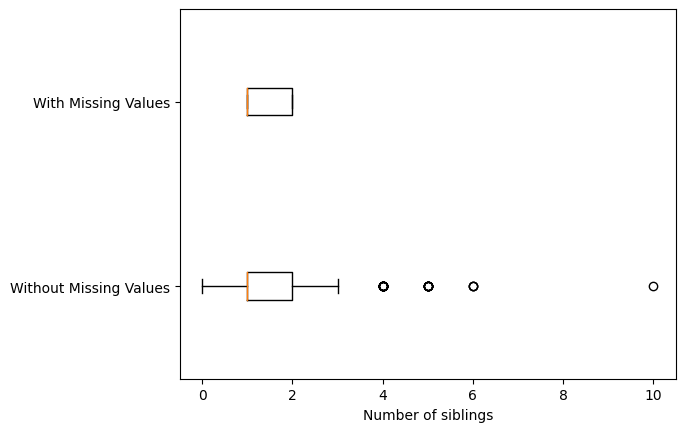

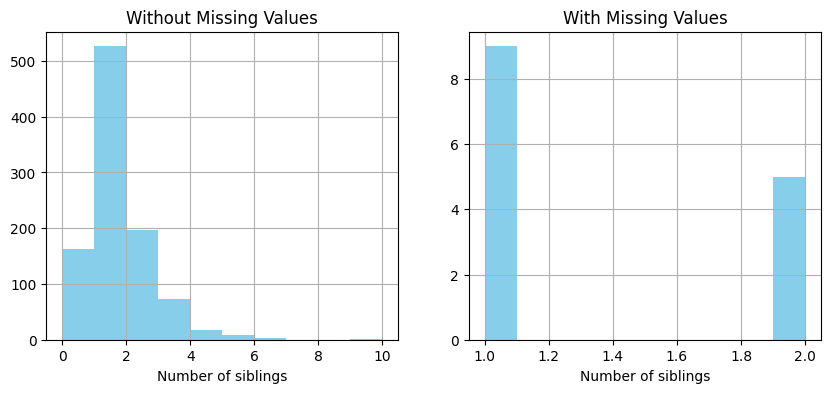

p-value of t-test: 0.8255092107556896

Análisis de variables categóricas:

Variable: Gender


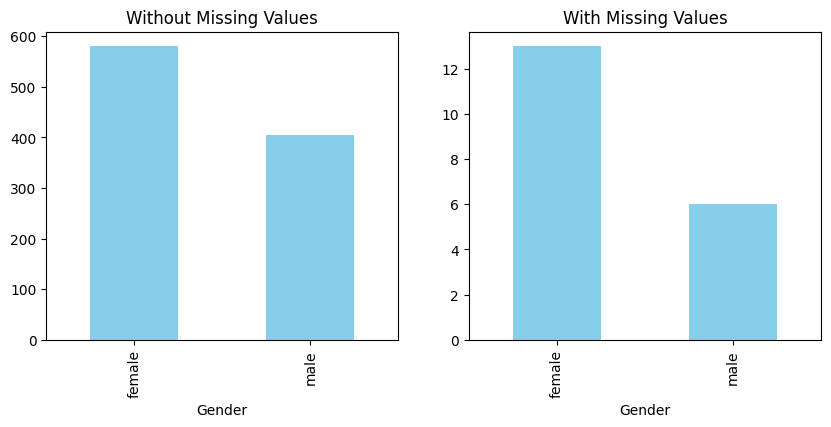

p-value of Chi_squared test: 0.5472167199163878

Variable: Education


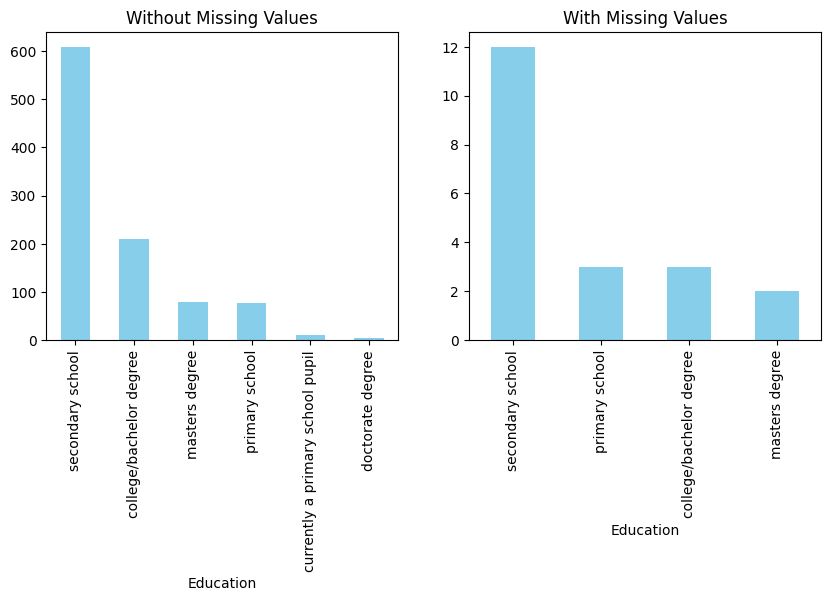

p-value of Chi_squared test: 0.8424822989541867

Conclusiones del análisis: 
 
Conclusiones para 'Age':
No existe una diferencia significativa en la edad entre los grupos con y sin valores faltantes en 'Weight'. (p-value: 0.7258)

Conclusiones para 'Number of siblings':
No existe una diferencia significativa en el número de hermanos entre los grupos con y sin valores faltantes en 'Weight'. (p-value: 0.8255)

Conclusiones para 'Gender':
No existe una diferencia significativa en la distribución de género entre los grupos con y sin valores faltantes en 'Weight'. (p-value: 0.5472)

Conclusiones para 'Education':
No existe una diferencia significativa en el nivel educativo entre los grupos con y sin valores faltantes en 'Weight'. (p-value: 0.8425)


In [13]:
print(f"{Fore.BLUE}Análisis de la relación entre valores faltantes de 'Weight' y otras variables{Style.RESET_ALL}")

# Crear la variable de máscara para valores faltantes en 'Weight'
BM_MV = response_df['Weight'].isna()

# Análisis de variables numéricas
print(f"\n{Fore.BLUE}Análisis de variables numéricas:{Style.RESET_ALL}")
print(f"\nVariable: Age")
Diagnose_MV_Numerical(response_df, 'Age', BM_MV)
print(f"\nVariable: Number of siblings")
Diagnose_MV_Numerical(response_df, 'Number of siblings', BM_MV)

# Análisis de variables categóricas
print(f"\n{Fore.BLUE}Análisis de variables categóricas:{Style.RESET_ALL}")
print(f"\nVariable: Gender")
Diagnose_MV_Categorical(response_df, 'Gender', BM_MV)
print(f"\nVariable: Education")
Diagnose_MV_Categorical(response_df, 'Education', BM_MV)

# Conclusiones del análisis
print(f"\n{Fore.RED}Conclusiones del análisis: \n {Style.RESET_ALL}")

# Análisis de 'Age'
print("Conclusiones para 'Age':")
p_value_age = ttest_ind(
    response_df[BM_MV]['Age'].dropna(),
    response_df[~BM_MV]['Age'].dropna()
).pvalue
if p_value_age < 0.05:
    print(f"Existe una diferencia significativa en la edad entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_age:.4f})")
else:
    print(f"No existe una diferencia significativa en la edad entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_age:.4f})")

# Análisis de 'Number of siblings'
print("\nConclusiones para 'Number of siblings':")
p_value_siblings = ttest_ind(
    response_df[BM_MV]['Number of siblings'].dropna(),
    response_df[~BM_MV]['Number of siblings'].dropna()
).pvalue
if p_value_siblings < 0.05:
    print(f"Existe una diferencia significativa en el número de hermanos entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_siblings:.4f})")
else:
    print(f"No existe una diferencia significativa en el número de hermanos entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_siblings:.4f})")

# Análisis de 'Gender'
print("\nConclusiones para 'Gender':")
contigency_table_gender = pd.crosstab(BM_MV, response_df['Gender'])
p_value_gender = chi2_contingency(contigency_table_gender)[1]
if p_value_gender < 0.05:
    print(f"Existe una diferencia significativa en la distribución de género entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_gender:.4f})")
else:
    print(f"No existe una diferencia significativa en la distribución de género entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_gender:.4f})")

# Análisis de 'Education'
print("\nConclusiones para 'Education':")
contigency_table_education = pd.crosstab(BM_MV, response_df['Education'])
p_value_education = chi2_contingency(contigency_table_education)[1]
if p_value_education < 0.05:
    print(f"Existe una diferencia significativa en el nivel educativo entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_education:.4f})")
else:
    print(f"No existe una diferencia significativa en el nivel educativo entre los grupos con y sin valores faltantes en 'Weight'. (p-value: {p_value_education:.4f})")

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [14]:
# Explicación de la medida de tendencia central recomendada
print(f"\n{Fore.BLUE}Imputación de valores faltantes en 'Weight' utilizando una medida de tendencia central{Style.RESET_ALL}")

# La mediana es la medida de tendencia central recomendada porque es menos sensible a los valores atípicos en comparación con la media.
# Esto hace que la mediana sea una opción más robusta para imputar valores faltantes, especialmente en distribuciones sesgadas o con outliers.

print(f"\n{Fore.BLUE}Recomendación: \n {Style.RESET_ALL} Se recomienda utilizar la mediana para imputar los valores faltantes de 'Weight' "
      f"porque es menos sensible a los valores atípicos en comparación con la media, lo que la hace una opción más robusta.")

# Calcular la mediana de la variable Weight
MedianaPeso = response_df['Weight'].median()

# Imputar los valores faltantes de Weight con la mediana
response_df['Weight'].fillna(MedianaPeso, inplace=True)

# Mostrar la mediana utilizada para la imputación
print()
print(f"{Fore.BLUE}La mediana de la variable 'Weight' utilizada para la imputación es:{Style.RESET_ALL} {Fore.GREEN}{MedianaPeso}{Style.RESET_ALL}")


Imputación de valores faltantes en 'Weight' utilizando una medida de tendencia central

Recomendación: 
  Se recomienda utilizar la mediana para imputar los valores faltantes de 'Weight' porque es menos sensible a los valores atípicos en comparación con la media, lo que la hace una opción más robusta.

La mediana de la variable 'Weight' utilizada para la imputación es: 64.0


7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

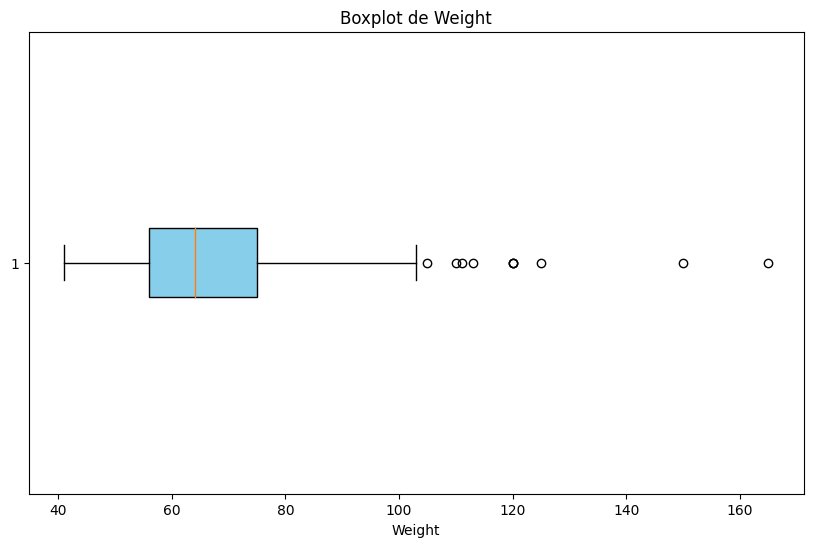


Límites calculados para identificar valores atípicos:
LimiteInferior: 27.5
LimiteSuperior: 103.5

Número de valores atípicos en 'Weight': 10

Nuevo DataFrame con los valores atípicos (ValoresAtipicosDF):
     Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
292    5.0                       4.0    5.0   2.0      3.0              2.0   
612    5.0                       3.0    5.0   1.0      1.0              3.0   
715    4.0                       3.0    2.0   3.0      3.0              3.0   
793    2.0                       3.0    3.0   1.0      2.0              3.0   
796    3.0                       5.0    3.0   2.0      2.0              4.0   
859    5.0                       3.0    4.0   4.0      2.0              3.0   
885    3.0                       4.0    3.0   2.0      2.0              2.0   
973    5.0                       3.0    2.0   5.0      5.0              4.0   
992    4.0                       4.0    4.0   1.0      4.0              4.0   
998  

In [15]:
# Crear un gráfico de boxplot para la variable Weight
plt.figure(figsize=(10, 6))
plt.boxplot(response_df['Weight'], vert=False, patch_artist=True, boxprops=dict(facecolor='#87CEEB'))
plt.title('Boxplot de Weight')
plt.xlabel('Weight')
plt.show()

# Calcular los límites para identificar valores atípicos
Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1

LimiteInferior = Q1 - 1.5 * IQR
LimiteSuperior = Q3 + 1.5 * IQR

# Imprimir los límites calculados
print()
print(f"{Fore.BLUE}Límites calculados para identificar valores atípicos:{Style.RESET_ALL}")
print(f"LimiteInferior: {LimiteInferior}")
print(f"LimiteSuperior: {LimiteSuperior}")

# Identificar los valores atípicos
ValoresAtipicos = response_df[(response_df['Weight'] < LimiteInferior) | (response_df['Weight'] > LimiteSuperior)]

# Contar los valores atípicos
CantidadValoresAtipicos = ValoresAtipicos.shape[0]

# Almacenar los valores atípicos en un dataframe independiente
ValoresAtipicosDF = ValoresAtipicos.copy()

# Eliminar los valores atípicos del conjunto original
response_df = response_df[~((response_df['Weight'] < LimiteInferior) | (response_df['Weight'] > LimiteSuperior))]

# Mostrar la cantidad de valores atípicos
print()
print(f"{Fore.BLUE}Número de valores atípicos en 'Weight':{Style.RESET_ALL} {Fore.GREEN}{CantidadValoresAtipicos}{Style.RESET_ALL}")

# Imprimir el nuevo DataFrame con los valores atípicos
print()
print(f"{Fore.BLUE}Nuevo DataFrame con los valores atípicos (ValoresAtipicosDF):{Style.RESET_ALL}")
print(ValoresAtipicosDF)

# Leyenda indicando que los valores atípicos han sido eliminados del DataFrame original
print()
print(f"{Fore.RED}Valores atípicos eliminados correctamente del DataFrame original (response_df).{Style.RESET_ALL}")
print()
print(f"{Fore.BLUE}Nombre del DataFrame original: response_df{Style.RESET_ALL}")
print(f"{Fore.BLUE}Nombre del nuevo DataFrame con valores atípicos: ValoresAtipicosDF{Style.RESET_ALL}")

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

0    163.0
1    163.0
2    176.0
3    172.0
4    170.0
5    186.0
6    177.0
7    184.0
8    166.0
9    174.0
Name: Height, dtype: float64
float64
19
float64
0    163.0
1    163.0
2    176.0
3    172.0
4    170.0
5    186.0
6    177.0
7    184.0
8    166.0
9    174.0
Name: Height, dtype: float64


<ipython-input-16-8a97dc643523>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Height'] = pd.to_numeric(response_df['Height'], errors='coerce')


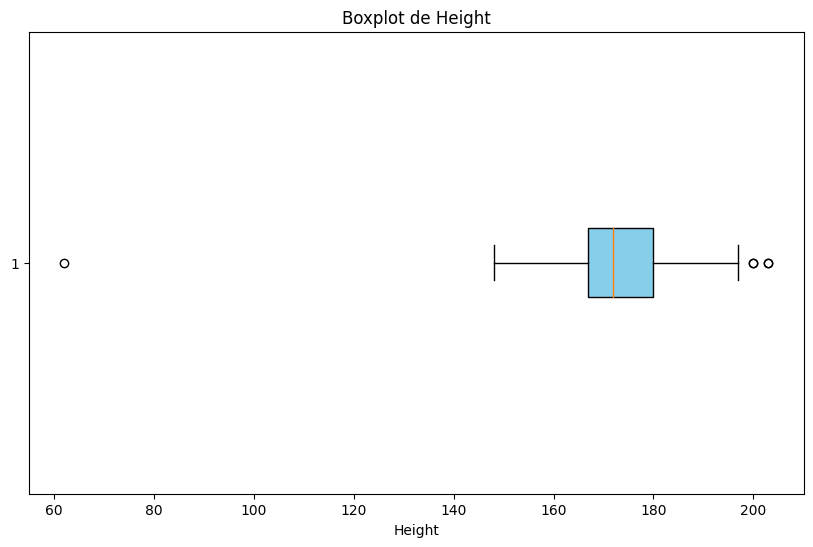


Límites calculados para identificar valores atípicos en 'Height':
LimiteInferior: 147.5
LimiteSuperior: 199.5

Número de valores atípicos en 'Height': 5

Nuevo DataFrame con los valores atípicos en 'Height' (ValoresAtipicosDF_Height):
     Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
97     5.0                       3.0    2.0   1.0      1.0              1.0   
220    5.0                       3.0    4.0   3.0      3.0              4.0   
547    5.0                       4.0    1.0   4.0      2.0              5.0   
676    5.0                       4.0    2.0   2.0      1.0              2.0   
799    5.0                       3.0    1.0   2.0      3.0              4.0   

     Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
97       1.0  2.0   1.0                1.0  ...  19.0   200.0    75.0   
220      2.0  1.0   3.0                1.0  ...  18.0   200.0    90.0   
547      3.0  1.0   4.0                5.0  ...  21.0   203.0    80.0 

In [16]:
# Inspeccionar los primeros valores de la columna 'Height'
print(response_df['Height'].head(10))

# Verificar los tipos de datos en la columna 'Height'
print(response_df['Height'].dtype)

# Verificar si hay valores faltantes en la columna 'Height'
print(response_df['Height'].isna().sum())

# Convertir la columna 'Height' a tipo numérico si no lo es, y manejar los errores
response_df['Height'] = pd.to_numeric(response_df['Height'], errors='coerce')

# Volver a verificar el tipo de datos después de la conversión
print(response_df['Height'].dtype)

# Volver a mostrar los primeros valores después de la conversión
print(response_df['Height'].head(10))

# Crear un gráfico de boxplot para la variable Height
plt.figure(figsize=(10, 6))
plt.boxplot(response_df['Height'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='#87CEEB'))
plt.title('Boxplot de Height')
plt.xlabel('Height')
plt.show()

# Calcular los límites para identificar valores atípicos en Height
Q1_Height = response_df['Height'].quantile(0.25)
Q3_Height = response_df['Height'].quantile(0.75)
IQR_Height = Q3_Height - Q1_Height

LimiteInferior_Height = Q1_Height - 1.5 * IQR_Height
LimiteSuperior_Height = Q3_Height + 1.5 * IQR_Height

# Imprimir los límites calculados para Height
print()
print(f"{Fore.BLUE}Límites calculados para identificar valores atípicos en 'Height':{Style.RESET_ALL}")
print(f"LimiteInferior: {LimiteInferior_Height}")
print(f"LimiteSuperior: {LimiteSuperior_Height}")

# Identificar los valores atípicos en Height
ValoresAtipicos_Height = response_df[(response_df['Height'] < LimiteInferior_Height) | (response_df['Height'] > LimiteSuperior_Height)]

# Contar los valores atípicos en Height
CantidadValoresAtipicos_Height = ValoresAtipicos_Height.shape[0]

# Almacenar los valores atípicos en Height en un dataframe independiente
ValoresAtipicosDF_Height = ValoresAtipicos_Height.copy()

# Eliminar los valores atípicos de Height del conjunto original
response_df = response_df[~((response_df['Height'] < LimiteInferior_Height) | (response_df['Height'] > LimiteSuperior_Height))]

# Mostrar la cantidad de valores atípicos en Height
print()
print(f"{Fore.BLUE}Número de valores atípicos en 'Height':{Style.RESET_ALL} {Fore.GREEN}{CantidadValoresAtipicos_Height}{Style.RESET_ALL}")

# Imprimir el nuevo DataFrame con los valores atípicos de Height
print()
print(f"{Fore.BLUE}Nuevo DataFrame con los valores atípicos en 'Height' (ValoresAtipicosDF_Height):{Style.RESET_ALL}")
print(ValoresAtipicosDF_Height)

# Leyenda indicando que los valores atípicos han sido eliminados del DataFrame original
print()
print(f"{Fore.RED}Valores atípicos eliminados correctamente del DataFrame original (response_df).{Style.RESET_ALL}")
print()
print(f"{Fore.BLUE}Nombre del DataFrame original: response_df{Style.RESET_ALL}")
print(f"{Fore.BLUE}Nombre del nuevo DataFrame con valores atípicos: ValoresAtipicosDF_Height{Style.RESET_ALL}")

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

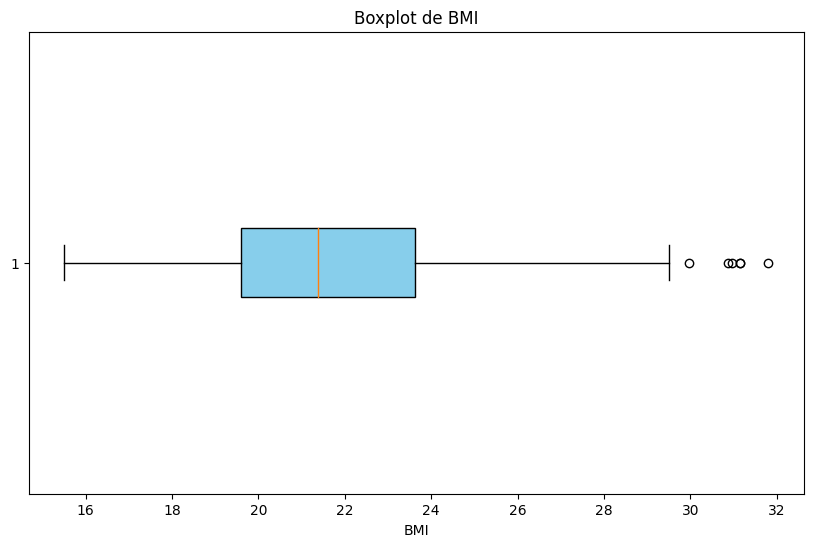


Límites calculados para identificar valores atípicos en 'BMI':
LimiteInferior: 13.535357432197834
LimiteSuperior: 29.685968905520618

Número de valores atípicos en 'BMI': 6

¿Hay encuestados que sean atípicos según su índice de masa corporal (BMI)? 
 
Sí, hay 6 encuestados que son atípicos según su índice de masa corporal (BMI).

Lista de encuestados atípicos según su índice de masa corporal (BMI):
Atípico 43: BMI = 31.14 (Weight = 90.0 kg, Height = 170.0 cm)
Atípico 152: BMI = 30.86 (Weight = 100.0 kg, Height = 180.0 cm)
Atípico 157: BMI = 30.96 (Weight = 97.0 kg, Height = 177.0 cm)
Atípico 358: BMI = 29.96 (Weight = 96.0 kg, Height = 179.0 cm)
Atípico 402: BMI = 31.14 (Weight = 90.0 kg, Height = 170.0 cm)
Atípico 637: BMI = 31.80 (Weight = 93.0 kg, Height = 171.0 cm)


In [17]:
# Crear una copia del DataFrame original para evitar SettingWithCopyWarning
response_df_copy = response_df.copy()

# Convertir la altura de centímetros a metros usando .loc para evitar SettingWithCopyWarning
response_df_copy.loc[:, 'Height_m'] = response_df_copy['Height'] / 100

# Calcular el BMI usando .loc para evitar SettingWithCopyWarning
response_df_copy.loc[:, 'BMI'] = response_df_copy['Weight'] / (response_df_copy['Height_m'] ** 2)

# Crear un gráfico de boxplot para la variable BMI
plt.figure(figsize=(10, 6))
plt.boxplot(response_df_copy['BMI'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='#87CEEB'))
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.show()

# Calcular los límites para identificar valores atípicos en BMI
Q1_BMI = response_df_copy['BMI'].quantile(0.25)
Q3_BMI = response_df_copy['BMI'].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI

LimiteInferior_BMI = Q1_BMI - 1.5 * IQR_BMI
LimiteSuperior_BMI = Q3_BMI + 1.5 * IQR_BMI

# Imprimir los límites calculados para BMI
print()
print(f"{Fore.BLUE}Límites calculados para identificar valores atípicos en 'BMI':{Style.RESET_ALL}")
print(f"LimiteInferior: {LimiteInferior_BMI}")
print(f"LimiteSuperior: {LimiteSuperior_BMI}")

# Identificar los valores atípicos en BMI
ValoresAtipicos_BMI = response_df_copy[(response_df_copy['BMI'] < LimiteInferior_BMI) | (response_df_copy['BMI'] > LimiteSuperior_BMI)]

# Contar los valores atípicos en BMI
CantidadValoresAtipicos_BMI = ValoresAtipicos_BMI.shape[0]

# Almacenar los valores atípicos en BMI en un dataframe independiente
ValoresAtipicosDF_BMI = ValoresAtipicos_BMI.copy()

# Eliminar los valores atípicos de BMI del conjunto original
response_df_copy = response_df_copy[~((response_df_copy['BMI'] < LimiteInferior_BMI) | (response_df_copy['BMI'] > LimiteSuperior_BMI))]

# Mostrar la cantidad de valores atípicos en BMI
print()
print(f"{Fore.BLUE}Número de valores atípicos en 'BMI':{Style.RESET_ALL} {Fore.GREEN}{CantidadValoresAtipicos_BMI}{Style.RESET_ALL}")

# Pregunta y respuesta final
print()
print(f"{Fore.RED}¿Hay encuestados que sean atípicos según su índice de masa corporal (BMI)? \n {Style.RESET_ALL}")
print(f"{Fore.BLACK}Sí, hay {CantidadValoresAtipicos_BMI} encuestados que son atípicos según su índice de masa corporal (BMI).{Style.RESET_ALL}")

# Mostrar la lista de los encuestados atípicos con sus valores de BMI
print(f"\n{Fore.BLUE}Lista de encuestados atípicos según su índice de masa corporal (BMI):{Style.RESET_ALL}")
for idx, row in ValoresAtipicosDF_BMI.iterrows():
    print(f"Atípico {idx + 1}: BMI = {row['BMI']:.2f} (Weight = {row['Weight']} kg, Height = {row['Height']} cm)")

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

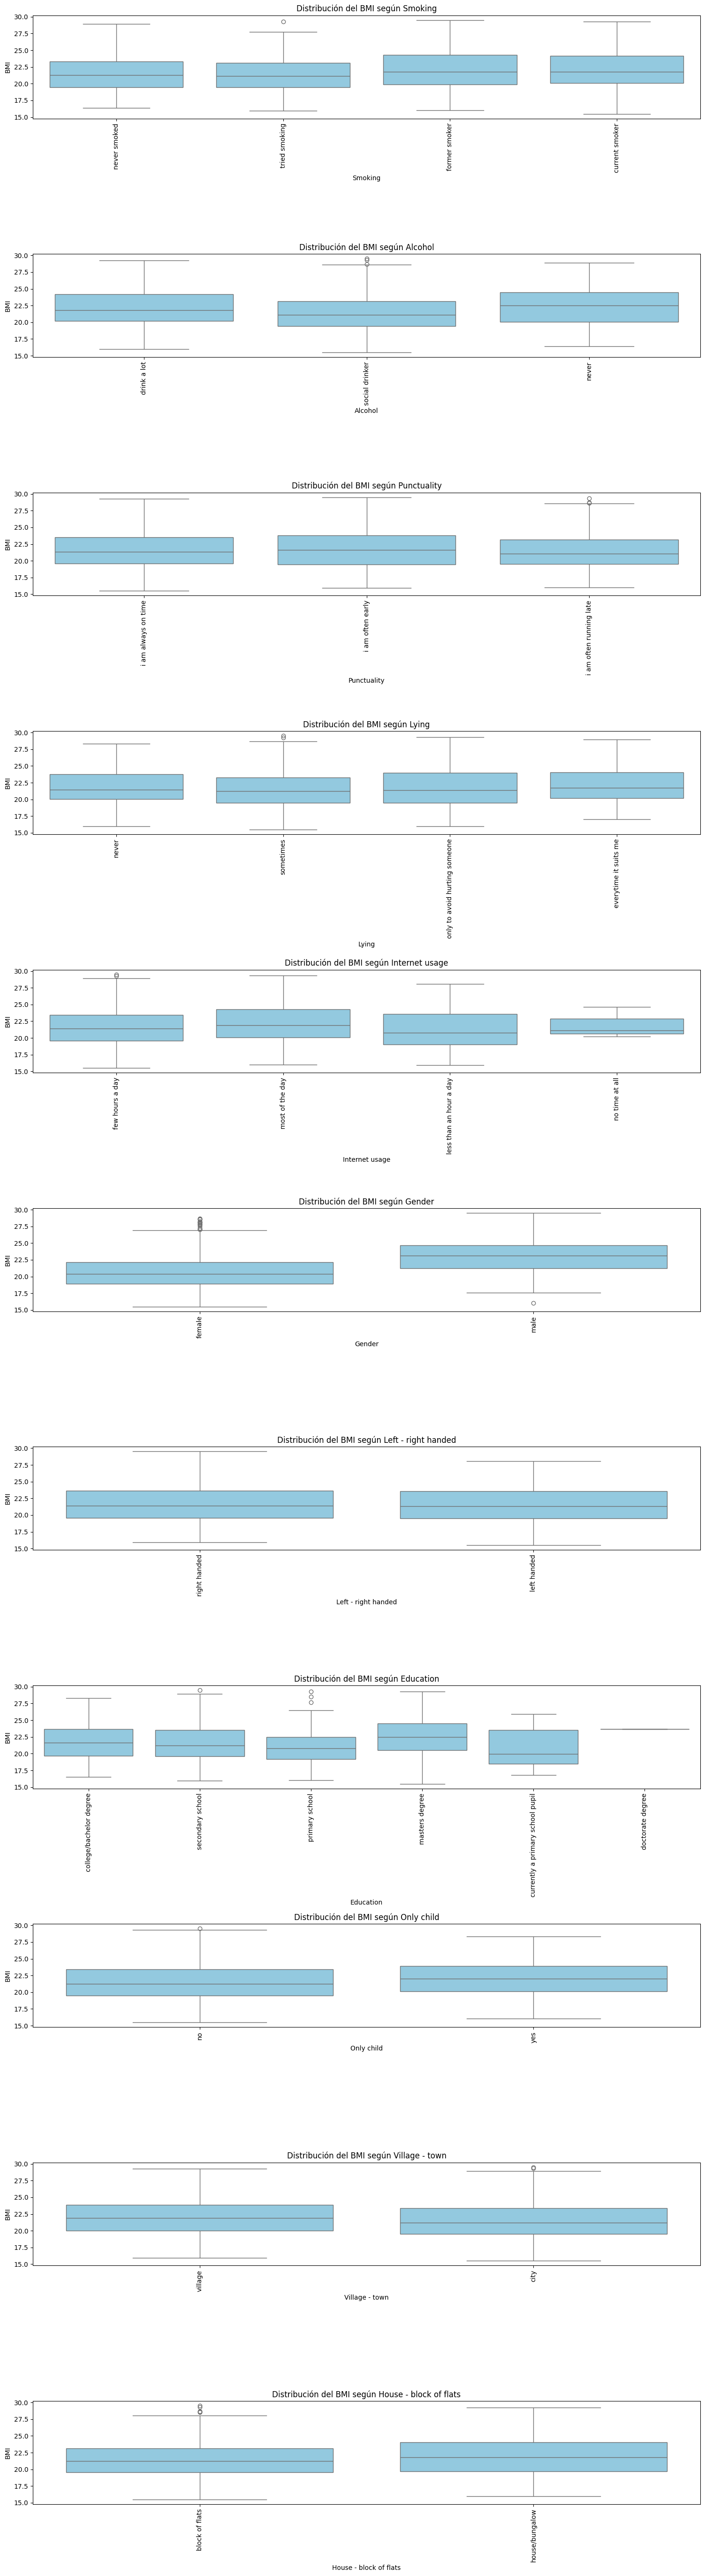

Comentario:
Variable 'Smoking':
  - Categoría 'current smoker' tiene una mediana de 21.79, un rango intercuartílico (IQR) de 4.08, y una dispersión total de 13.77.
  - Categoría 'former smoker' tiene una mediana de 21.77, un rango intercuartílico (IQR) de 4.40, y una dispersión total de 13.46.
  - Categoría 'never smoked' tiene una mediana de 21.26, un rango intercuartílico (IQR) de 3.84, y una dispersión total de 12.55.
  - Categoría 'tried smoking' tiene una mediana de 21.14, un rango intercuartílico (IQR) de 3.69, y una dispersión total de 13.36.

Variable 'Alcohol':
  - Categoría 'drink a lot' tiene una mediana de 21.83, un rango intercuartílico (IQR) de 4.01, y una dispersión total de 13.30.
  - Categoría 'never' tiene una mediana de 22.52, un rango intercuartílico (IQR) de 4.46, y una dispersión total de 12.55.
  - Categoría 'social drinker' tiene una mediana de 21.13, un rango intercuartílico (IQR) de 3.70, y una dispersión total de 14.01.

Variable 'Punctuality':
  - Categoría 

In [18]:
# Identificar las variables categóricas en el DataFrame
categorical_vars = response_df_copy.select_dtypes(include=['object']).columns

# Crear gráficos de boxplot para la distribución del BMI según cada variable categórica
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(15, 5 * len(categorical_vars)))

# Usar un color azul claro para los boxplots
boxplot_color = '#87CEEB'
observaciones = []

for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='BMI', data=response_df_copy, ax=axes[i], color=boxplot_color)
    axes[i].set_title(f'Distribución del BMI según {var}')
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

    # Calcular estadísticas básicas para las observaciones
    grupo_stats = response_df_copy.groupby(var)['BMI'].describe()
    obs = f"Variable '{var}':\n"
    for categoria in grupo_stats.index:
        obs += (f"  - Categoría '{categoria}' tiene una mediana de {grupo_stats.loc[categoria, '50%']:.2f}, "
                f"un rango intercuartílico (IQR) de {grupo_stats.loc[categoria, '75%'] - grupo_stats.loc[categoria, '25%']:.2f}, "
                f"y una dispersión total de {grupo_stats.loc[categoria, 'max'] - grupo_stats.loc[categoria, 'min']:.2f}.\n")
    observaciones.append(obs)

plt.tight_layout()
plt.show()

# Comentar un hallazgo que llame la atención basado en las observaciones generadas
print(f"{Fore.RED}Comentario:{Style.RESET_ALL}")
for obs in observaciones:
    print(f"{Fore.BLACK}{obs}{Style.RESET_ALL}")

# **Comentario y Hallazgo**

***Hallazgo Principal:***

Al analizar las distribuciones del índice de masa corporal (BMI) a través de diferentes variables categóricas, un hallazgo notable es la diferencia en la mediana del BMI entre los géneros:

	•	Variable ‘Gender’:
	•	La categoría ‘female’ tiene una mediana de 20.42, un rango intercuartílico (IQR) de 3.24, y una dispersión total de 13.15.
	•	La categoría ‘male’ tiene una mediana de 23.11, un rango intercuartílico (IQR) de 3.47, y una dispersión total de 13.50.

Esta observación sugiere que, en promedio, los hombres tienen un BMI más alto que las mujeres en este conjunto de datos. Además, la dispersión y el IQR son similares para ambos géneros, lo que indica una variabilidad comparable dentro de cada grupo. Esta diferencia en la mediana del BMI puede estar influenciada por diversos factores, incluidos los hábitos alimenticios, la actividad física, y la composición corporal.

***Otros Hallazgos Notables:***

	1.	Variable ‘Alcohol’:
	•	Los “social drinker” tienen una mediana de BMI más baja (21.13) en comparación con los que “never” beben alcohol (22.52).
	•	Esto sugiere que la frecuencia del consumo de alcohol puede estar relacionada con variaciones en el BMI.
	2.	Variable ‘Education’:
	•	Los encuestados con “doctorate degree” tienen una mediana de BMI significativamente más alta (23.70) pero con una dispersión total de 0.00, lo que indica una baja variabilidad en este grupo específico.
	•	Los “currently a primary school pupil” tienen una mediana de BMI más baja (19.92), lo que es esperado dado que la mayoría son niños.
	3.	Variable ‘Only child’:
	•	Los encuestados que son hijos únicos tienen una mediana de BMI ligeramente mayor (22.04) en comparación con aquellos que tienen hermanos (21.22).
	4.	Variable ‘Village - town’:
	•	Los encuestados que viven en “village” tienen una mediana de BMI más alta (21.88) que aquellos que viven en “city” (21.22).

Estos hallazgos indican la posible influencia de factores sociodemográficos y de estilo de vida en la distribución del BMI. Es importante considerar estos factores en estudios de salud pública y en el desarrollo de intervenciones para controlar y gestionar el índice de masa corporal en diferentes poblaciones.